## Script to plot eigenvalue spectra

In [9]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pickle

### Settings to modify

In [60]:
versions = np.array(['1-link', '2-links'])
name = versions[1]

# adding using unstable eigenvalues
unstable = False

# limits on size of community matrices
nMin = 2
nMax = 10
row = 3

# number of files with data
fMin = 0
fMax = 1

# parameters for histogram data (for comparison)
rangeReal = [-1,1]
binsReal = 40

filename = name + '_N' + str(nMin) +'-'+ str(nMax)
print('filename:', filename)
nMax = nMax + 1

filename: 2-links_N2-10


### Importing data
Merge unstable and stable?

In [42]:
partData = []

for f in range(fMin, fMax) :
    #partData.append(np.loadtxt('../data/' + name + '/eig_stab.txt'))
    partData.append(np.loadtxt('/home/jovyan/work/bachelor_data/old/' + name + '/eig_stab_0'+str(f)+'.txt'))

if unstable == True:
    for f in range(fMin, fMax) :
        #partData.append(np.loadtxt('../data/' + name + '/eig_stab.txt'))
        partData.append(np.loadtxt('/home/jovyan/work/bachelor_data/old/' + name + '/eig_unstab_0'+str(f)+'.txt'))

    
data = np.concatenate(partData)
data = data[:,1:]
#data.shape

### Sorting data
Remove duplicates and sorting after size

In [43]:
# Removing duplicates
# perform lex sort and get sorted data
sorted_idx = np.lexsort(data.T)
sorted_data =  data[sorted_idx,:]

# get unique row mask
row_mask = np.append([True],np.any(np.diff(sorted_data,axis=0),1))

# get unique rows
uniqueData = sorted_data[row_mask]

size = uniqueData[:,0].astype(int)
eigData = uniqueData[:,1:]

print(f'Number of unique food webs: {len(size):2.0f}\nMax size: {max(size):2.0f}\n\nSize:  #')



# sorting after size
real, imag = [], []

for n in range(nMin, nMax) :
    mask = (size == n)
    dataTemp = eigData[mask]
    realTemp = np.concatenate(dataTemp.T[0:2*n:2])
    imagTemp = np.concatenate(dataTemp.T[1:2*n:2])

    real.append(realTemp)
    imag.append(imagTemp)
    

for n in range(nMin, nMax) :
    print(f'{n:2.0f}:   {len(real[n-nMin])/n:2.0f}')

Number of unique food webs: 28754
Max size: 10

Size:  #
 2:   3077
 3:   9781
 4:   4726
 5:   7050
 6:   1363
 7:   1422
 8:   125
 9:   107
10:    4


In [44]:
# saving sorted data
with open('sorted_data/real_' + filename + '.pickle', 'wb') as file:
    pickle.dump(real, file)
    
with open('sorted_data/imag_' + filename + '.pickle', 'wb') as file:
    pickle.dump(imag, file)

#### Plotting

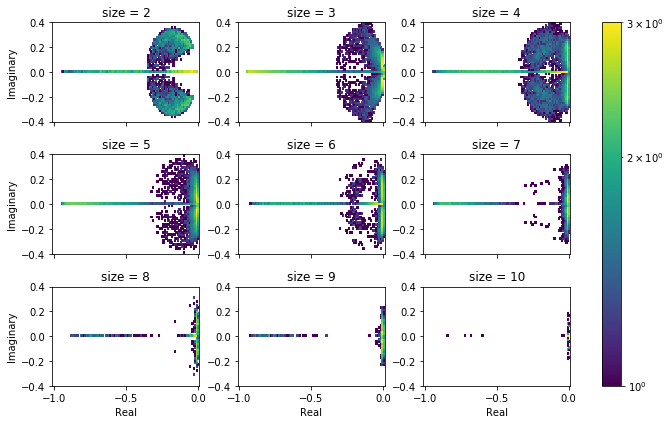

In [45]:
bins = [100,50]
range2d = [[-1.01, 0.01], [-0.4, 0.4]]

fig, axes = plt.subplots(row, 3, figsize=(10,6), sharex=True, sharey=False)
axes[0,0].set(ylabel='Imaginary')
axes[1,0].set(ylabel='Imaginary')
axes[2,0].set(ylabel='Imaginary')
axes[row-1,0].set(xlabel='Real', ylabel='Imaginary')
axes[row-1,1].set(xlabel='Real')
axes[row-1,2].set(xlabel='Real')

i = nMin
for ax in axes.flat:
    ax.set(title='size = ' + str(i));
    _,_,_, im = ax.hist2d(real[i-nMin], imag[i-nMin], bins=bins, range=range2d, norm = mpl.colors.LogNorm());
    i += 1;

    fig.tight_layout();
fig.colorbar(im, ax=axes.ravel().tolist());      

In [46]:
#fig.savefig('../paper/figs/zoom_spectra_' + filename +'.png', dpi=100)

### Histogram of real eigenvalues
Producing values for comparing spectra

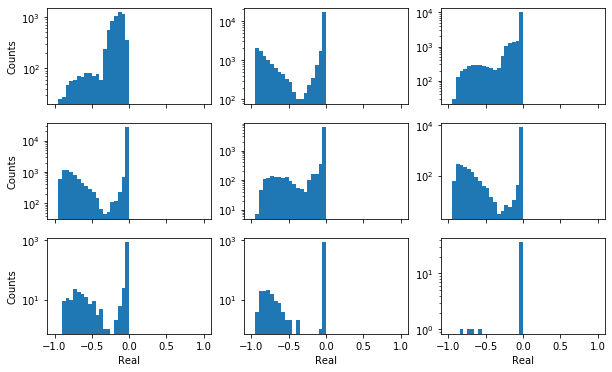

In [94]:
#binsReal = 60
#rangeReal = [-1,1]

fig, axes = plt.subplots(row,3, figsize=(10,6), sharex=True, sharey=False)
axes[0,0].set(ylabel='Counts')
axes[1,0].set(ylabel='Counts')
axes[2,0].set(ylabel='Counts')
axes[row-1,0].set(xlabel='Real', ylabel='Counts')
axes[row-1,1].set(xlabel='Real')
axes[row-1,2].set(xlabel='Real')

i = 0
countsReal = np.zeros([nMax-nMin, binsReal])
binEdgesReal = np.zeros([nMax-nMin, binsReal+1])

for ax in axes.flat:
    countsReal[i,:], binEdgesReal[i,:] ,_ = ax.hist(real[i], bins=binsReal, range=rangeReal, \
                                                    density=False, label='All');
    #countsReal[i,:], binEdgesReal[i,:] ,_ = ax.hist(real[i], bins=binsReal);
    ax.set(yscale='log')
    i += 1
fig;

### Plotting only realvalued eigenvalues

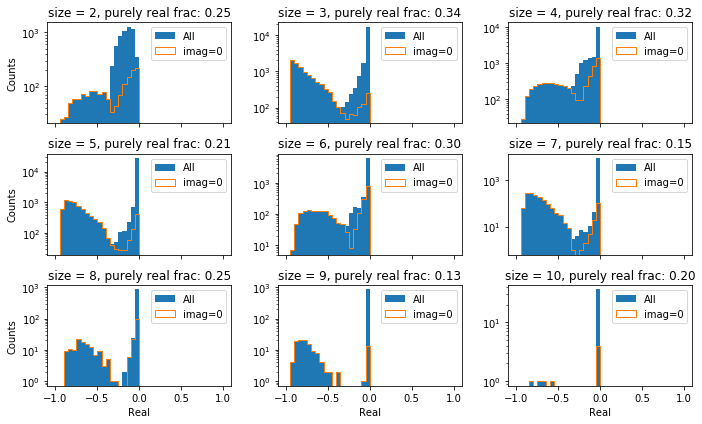

In [95]:
# sorting data
purelyReal = []
imagReal = []
realFrac = []

for i in range(len(imag)) :
    mask = (imag[i] == 0)
    temp = real[i][mask]
    purelyReal.append(temp)
    realFrac.append(len(temp)/len(real[i]))
    
    mask = (imag[i] != 0)
    imagReal.append(real[i][mask])
    
    
# plotting
i = 0

for ax in axes.flat:
    ax.set(title=f'size = {nMin+i:1.0f}, purely real frac: {realFrac[i]:2.2f}')
    ax.hist(purelyReal[i], bins=binsReal, range=rangeReal, histtype='step', density=False, label='imag=0');    
    #ax.hist(imagReal[i], bins=binsReal, range=rangeReal, histtype='step', density=False, label='imag!=0');
    ax.legend();
    
    i += 1
    
fig.tight_layout();
fig

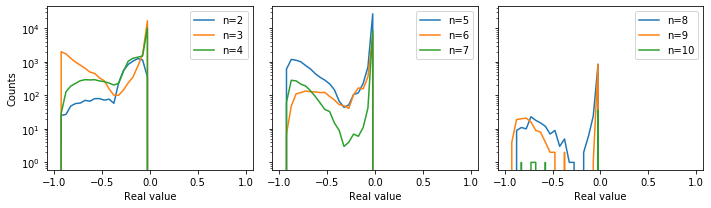

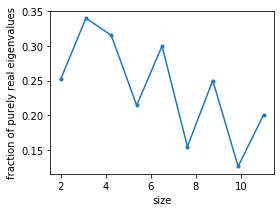

In [105]:
binCentersReal = (binEdgesReal[:,0:-1] + binEdgesReal[:,1:])/2

ii = 3

fig, ax = plt.subplots(1,3, figsize=(10,3), sharey=True);
for i in range(ii) :
    for j in range(3) :
        ax[j].plot(binCentersReal[i+ii*j], countsReal[i+ii*j], label='n='+str(nMin+i+ii*j));
        ax[j].set(xlabel='Real value', yscale='log')
        ax[j].legend();
        
ax[0].set(ylabel='Counts');
fig.tight_layout();


nSize = np.linspace(nMin, nMax, nMax-nMin)

fig, ax = plt.subplots(1,1, figsize=(4,3));
ax.plot(nSize, realFrac,'.-');
ax.set(xlabel='size', ylabel='fraction of purely real eigenvalues');

In [44]:
np.savetxt('sorted_data/x' + filename + '_binned.txt', binCentersReal, newline='\n')
np.savetxt('sorted_data/y' + filename + '_binned.txt', countsReal, newline='\n')

### Histogram of imaginary eigenvalues

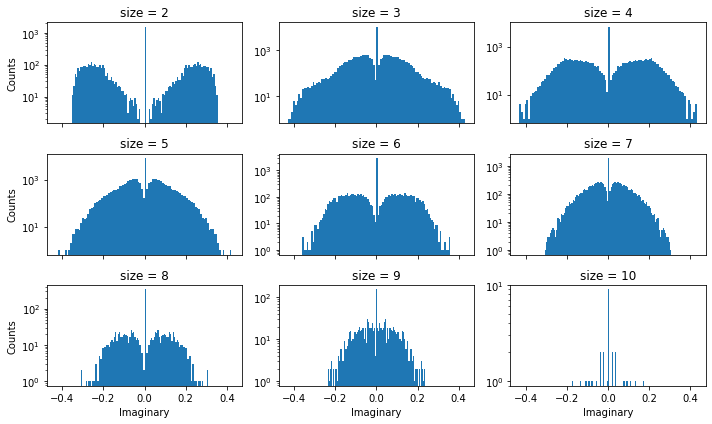

In [79]:
bins = 100

fig, axes = plt.subplots(3,3, figsize=(10,6), sharex=True, sharey=False)
axes[0,0].set(ylabel='Counts')
axes[1,0].set(ylabel='Counts')
axes[2,0].set(ylabel='Counts')
axes[2,0].set(xlabel='Imaginary', ylabel='Counts')
axes[2,1].set(xlabel='Imaginary')
axes[2,2].set(xlabel='Imaginary')

i = 0
countsImag = np.zeros([nMax-nMin, bins])
binEdgesImag = np.zeros([nMax-nMin, bins+1])

for ax in axes.flat:
    ax.set(title='size = ' + str(nMin+i))
    countsImag[i,:], binEdgesImag[i,:] ,_ = ax.hist(imag[i], bins=bins);
    ax.set(yscale='log')
    i += 1

fig.tight_layout();